<a href="https://colab.research.google.com/github/jppinedal/SimulacionDeSistemas/blob/main/taller5_Simulaci%C3%B3n_de_sitemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller 5 Simulación de sisitemas - 2023-2S
### Juan Pablo Pineda Lopera

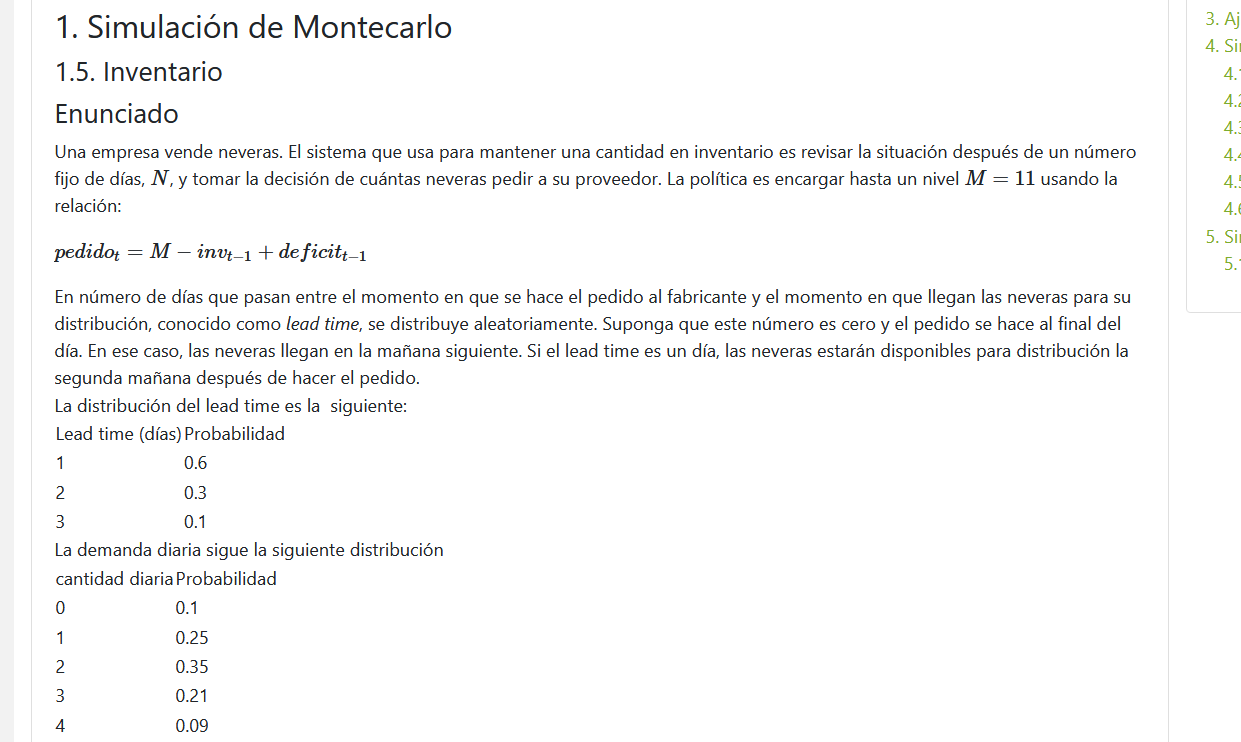


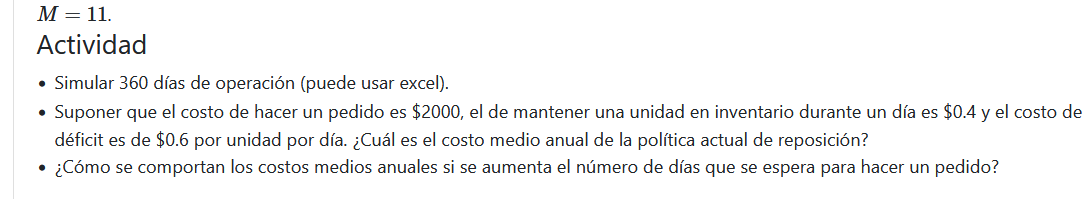

In [ ]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def diasEntrega():
  r = random.random()
  if r <= 0.6:
    leadTime = 1 #Días de entrega del pedido
  elif r <= 0.6+0.3: #Probabilidad acumulada
    leadTime = 2
  else:
    leadTime = 3 #r<=0.6+0.3+0.1 probabilidad acumulada
  return leadTime

def demandaDiaria():
  r = random.random()
  if r <= 0.1:
    neverasDia = 0

  elif r <= 0.1+0.25:
    neverasDia = 1

  elif r <= 0.1+0.25+0.35:
    neverasDia = 2

  elif r <= 0.1+0.25+0.35+0.21:
    neverasDia = 3

  elif r <= 0.1+0.25+0.35+0.21+0.09:
    neverasDia = 4

  return neverasDia



In [29]:
def costo_reponiendo_cada(dias):
  """
  lista_inventario = []
  lista_deficit = []
  lista_espera = []
  lista_pedido = []
  """
  lista_costo = []
  for i in range(10000):
    # Datos y condiciones iniciales
    M = 11
    inventario = 3
    deficit = 0
    espera = 2
    pedido = 8
    costo = 2000

    for i in range(1,360):
      if i%dias == 0: # Si llegamos al 5to día,  realizamos un nuevo pedido
        pedido = M - inventario + deficit
        espera = diasEntrega() + 1 #Agregamos 1 para que al llegar al día 0 se cumpla la condicion
        costo += 2000
      if espera == 0: # Si cumplimos con los dias de espera del pedido, agregamos la cantidad de neveras solicitadas al pedido
        if inventario + pedido - deficit >= 0:
          inventario += pedido - deficit
          deficit = 0


        else: # Si tenemos un mayor deficit que la suma entre inventario y pedido, reduciomos el deficit con el pedido que llega
          deficit = abs(pedido - deficit)

      demandaDia =  demandaDiaria()
      if inventario -  demandaDia >= 0:
        inventario -= demandaDia
        costo += inventario*0.4

      else:
        deficit += abs(inventario - demandaDia)
        inventario = 0
        costo += deficit*0.6

      espera -= 1 #Reducimos los días de espera
    lista_costo.append(costo)

  costo_medio_anual = sum(lista_costo)/len(lista_costo)
  return costo_medio_anual

print(f"Costo medio anual con política de reposición de 5 días para hacer el pedido con 10000 simulaciones: ${costo_reponiendo_cada(5)}")

Costo medio anual con política de reposición de 5 días para hacer el pedido con 10000 simulaciones: $144553.2553000005


In [30]:
lista_n = []
lista_costosPromedios = []
for i in range(5,15):
  lista_n.append(i)
  lista_costosPromedios.append(costo_reponiendo_cada(i))

print(lista_n) # Lista de días donde se hace el pedido para reponer neveras  iniciando desde 5 días hasta 14
print(lista_costosPromedios) #Lista de costos promedios anuales


[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[144553.65388000055, 120646.24277999981, 104764.8100600003, 90895.13091999985, 81039.36562000024, 73192.79224000014, 67346.86600000017, 61513.293460000205, 57673.149440000154, 53840.21041999989]


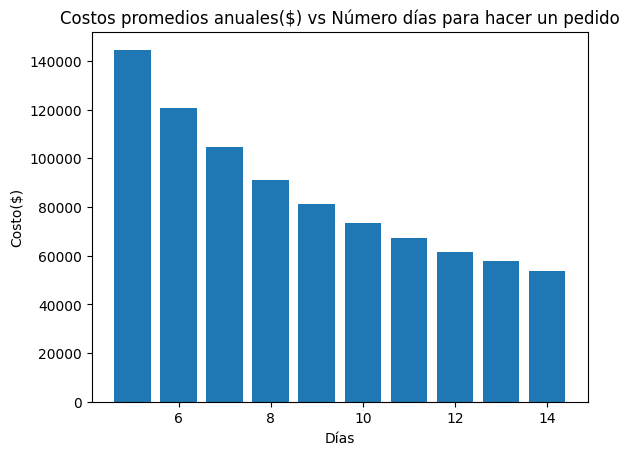

In [31]:
# Graficamos para visualiza el comportamiento de los costos medio anuales al aumentar el número de días que se espera para hacer un pedido

plt.bar(lista_n, lista_costosPromedios)
plt.xlabel('Días')
plt.ylabel('Costo($)')
plt.title('Costos promedios anuales($) vs Número días para hacer un pedido')


# Mostrar  gráfico
plt.show()


Podemos evidenciar que al aumentar el número de días que se espera para hacer un pedido, se reducen l0s costos medios anuales por política de reposición lo cual tiene sentido puesto que el mayor costo asociado se genera al realizar un pedido de neveras frente al costo por el déficit al no tener inventario.